## COMTRADE FREE ACCESS API: Usage Example

In [1]:
import ComtradeFreeAccess

In [2]:
comtrade = ComtradeFreeAccess.ComtradeFreeAccess()

In [3]:
params = {'max':'100000',       #default
          'type': 'C',        #C = commodities; S= services
          'freq': 'A',    #A = annual; M = monthly
          'px'  : 'HS',          #Classification  codes HS is "as reported"
          'ps'  : '2016,2017,2018,2019,2020',
          'r'   : 'all',
          'p'   : '0',        #p partner area (default = all): partner area. The area receiving the trade, based on the reporting areas data. 0 is "World"
          'rg'  : '2',       #rg trade flow (default = all): The most common area 1 (imports) and 2 (exports)
          'cc'  : 'TOTAL',    #cc classification code (default = AG2): a commodity code valid in the selected classification.
          'fmt':'json'     #fmt format: csv or json (default)
          }

In [50]:
dataset = comtrade.download_comtrade(params)

{'max': '100000', 'type': 'C', 'freq': 'A', 'px': 'HS', 'ps': '2016,2017,2018,2019,2020', 'r': 'all', 'p': '0', 'rg': '2', 'cc': 'TOTAL', 'fmt': 'json'} 



In [51]:
data = dataset.groupby(['yr','rtTitle']).agg({'TradeValue':'sum'}).unstack(0).fillna(0).reset_index()
data.columns = ['country'] + ["trade"+str(yr) for yr in range(2016,2021,1)]
data = data.sort_values(by='trade2020', ascending=False).reset_index(drop=True) 

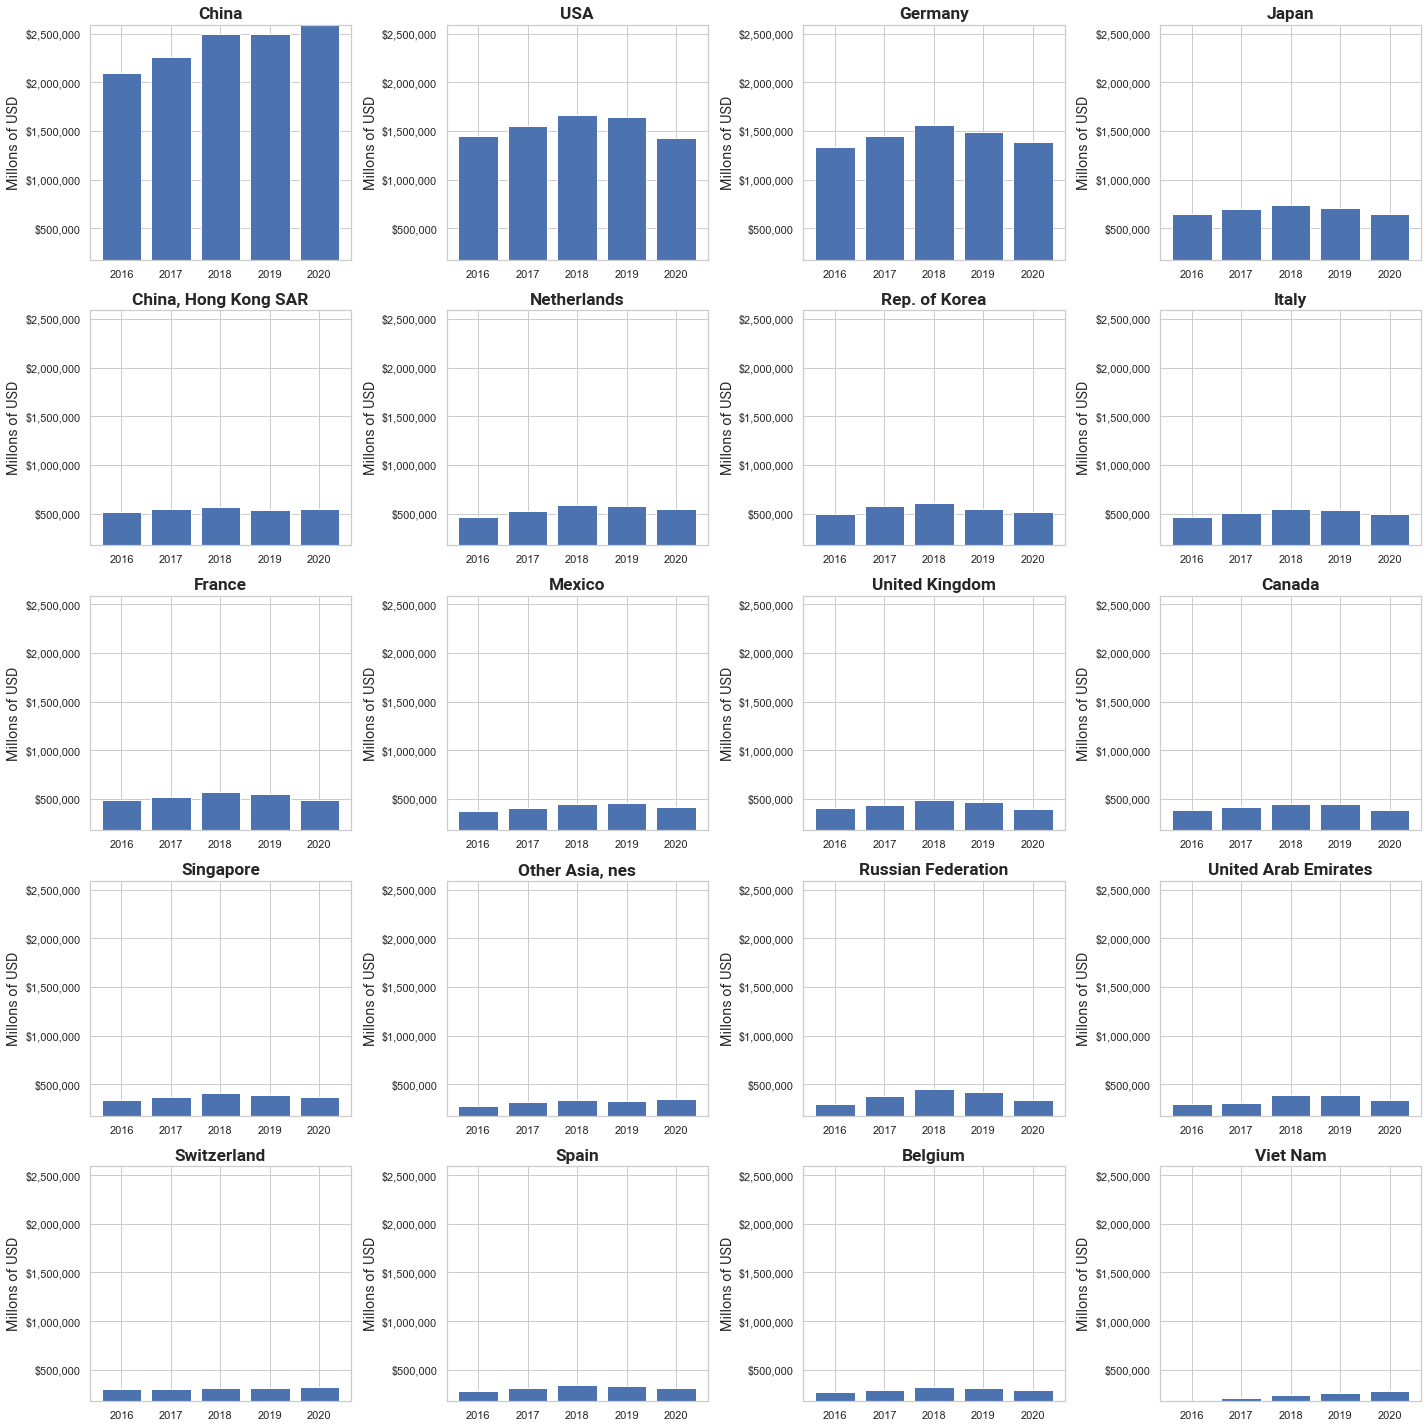

In [95]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
import seaborn as sns
sns.set_theme(style="whitegrid")

from tempfile import NamedTemporaryFile
import urllib

#Font Roboto Bold
roboto_bold = "https://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Bold.ttf?raw=true"
response = urllib.request.urlopen(roboto_bold)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
prop1 = fm.FontProperties(fname=f.name, size="x-large")

#Font Roboto Regular
roboto_reg = "http://github.com/googlefonts/roboto/blob/main/src/hinted/Roboto-Regular.ttf?raw=true"
response = urllib.request.urlopen(roboto_reg)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
prop2 = fm.FontProperties(fname=f.name, size="large")

def millions(x, pos):
    """The two args are the value and tick position."""
    return '${:1,.0f}'.format(x*1e-6)

TopN = 20
plot_df = data.head(TopN)

n_cols = 4
n_rows = 5
years = [yr for yr in range(2016,2021,1)]
fig, axs = plt.subplots(figsize = (n_cols*5, n_rows*4), nrows=n_rows, ncols = n_cols)

MAX = plot_df.iloc[:,1:].max().max()
MIN = plot_df.iloc[:,1:].min().min()

countries = plot_df.country.unique()
h = 0
for i in range(n_rows):
    for j in range(n_cols):
        axs[i][j].bar(years, plot_df.set_index('country').loc[countries[h],:].values)
        axs[i][j].set_title(countries[h], fontproperties=prop1)
        axs[i][j].set_ylabel("Millons of USD", fontproperties=prop2)
        axs[i][j].yaxis.set_major_formatter(millions)
        axs[i][j].set_ylim(MIN, MAX)
        h += 1
plt.tight_layout()
plt.show()   